In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
colors = {"DCT": "#800515",
               "IC/DCT": "#bd5713",
               "Endothelium": "#63ad2d", 
               "PC": "#a4b507",
               "Immune": "black",
               "Podo": "#6e640e", 
               "Fibro": "#1c768a",
               "VSMC/Mes": "#3e9c72",
               "PT": "#448efc",
               "PT?": "#51657a", 
               "iPT": "#6f37b3",
               "PEC": "#ff0011",
               "TAL": "#b44dbf",
               "Injured TAL": "#e3126d",
         }

In [3]:
adata = sc.read_h5ad("/home/levinsj/spatial/adata/7_13_23_slide0_annotated.h5ad")

In [4]:
adata.obs["sample"].value_counts()

sample
HK3039    283641
HK2844    274960
Name: count, dtype: int64

In [5]:
adata.obs["cellType_CosMx_1"].value_counts()

cellType_CosMx_1
PT             167722
TAL             75458
Fibro           70389
Endothelium     52335
Immune          40993
PC              37993
IC/DCT          25426
Injured TAL     24028
DCT             22763
iPT             18183
Podo             8920
VSMC/Mes         8636
PEC              5755
Name: count, dtype: int64

  0%|          | 0/1000 [00:00<?, ?/s]

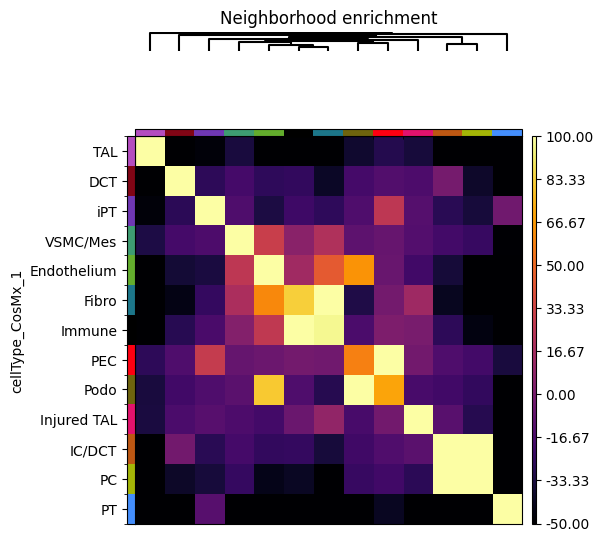

In [6]:
sq.gr.spatial_neighbors(
    adata,
    n_neighs=1,
    coord_type="generic",
    key_added = "1_nn"
)

sq.gr.nhood_enrichment(adata, cluster_key="cellType_CosMx_1", connectivity_key = "1_nn")
sq.pl.nhood_enrichment(
    adata,
    cluster_key="cellType_CosMx_1",
    method="average",
    cmap="inferno",
    connectivity_key = "1_nn",
    vmin=-50,
    vmax=100,
    figsize=(5, 5),
)



  0%|          | 0/1000 [00:00<?, ?/s]

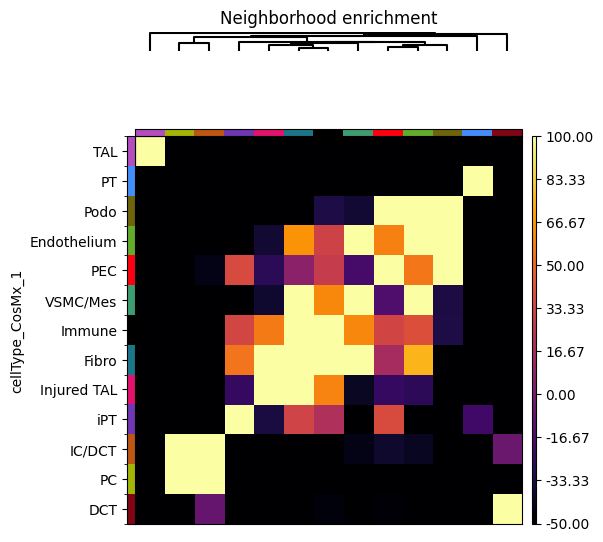

In [7]:
sq.gr.spatial_neighbors(
    adata,
    n_neighs=20,
    coord_type="generic",
    key_added = "20_nn"
)

sq.gr.nhood_enrichment(adata, cluster_key="cellType_CosMx_1", connectivity_key = "20_nn")
sq.pl.nhood_enrichment(
    adata,
    connectivity_key = "20_nn",
    cluster_key="cellType_CosMx_1",
    method="average",
    cmap="inferno",
    vmin=-50,
    vmax=100,
    figsize=(5, 5),
)


  0%|          | 0/1000 [00:00<?, ?/s]

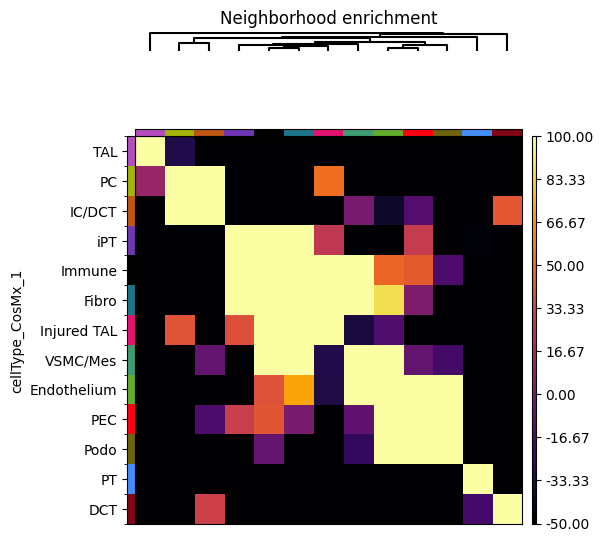

In [8]:
sq.gr.spatial_neighbors(
    adata,
    n_neighs=100,
    coord_type="generic",
    key_added = "100_nn"
)

sq.gr.nhood_enrichment(adata, cluster_key="cellType_CosMx_1", connectivity_key = "100_nn")
sq.pl.nhood_enrichment(
    adata,
    cluster_key="cellType_CosMx_1",
    connectivity_key = "100_nn",
    method="average",
    cmap="inferno",
    vmin=-50,
    vmax=100,
    figsize=(5, 5),
)

  0%|          | 0/1000 [00:00<?, ?/s]

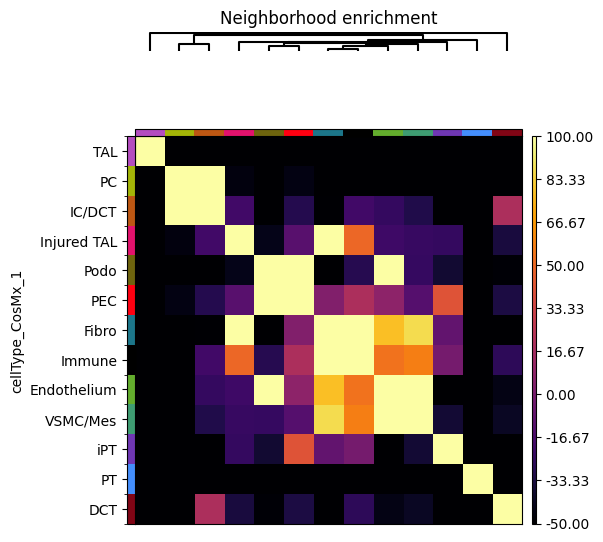

In [9]:
sq.gr.spatial_neighbors(
    adata,
    radius=0.02,
    coord_type="generic",
    key_added = "20_micron"
)

sq.gr.nhood_enrichment(adata, cluster_key="cellType_CosMx_1", connectivity_key = "20_micron")
sq.pl.nhood_enrichment(
    adata,
    cluster_key="cellType_CosMx_1",
    connectivity_key = "20_micron",
    method="average",
    cmap="inferno",
    vmin=-50,
    vmax=100,
    figsize=(5, 5),
)

In [10]:
df = adata.obs["cellType_CosMx_1"].value_counts().to_frame()
df.index = adata.obs["cellType_CosMx_1"].value_counts().index

df['sampleBreakdown'] = object
df['sampleOrder_connectivity'] = object
df['nn1'] = object
df['nn20'] = object
df['nn100'] = object
df['micron20'] = object


print(df.index)

new_order = [0,9,12,1,7,8,6,5,10,2,11,3,4]
df = df.reindex(df.index[new_order])

print(df.index)

CategoricalIndex(['PT', 'TAL', 'Fibro', 'Endothelium', 'Immune', 'PC',
                  'IC/DCT', 'Injured TAL', 'DCT', 'iPT', 'Podo', 'VSMC/Mes',
                  'PEC'],
                 categories=['DCT', 'Endothelium', 'Fibro', 'IC/DCT', ..., 'Podo', 'TAL', 'VSMC/Mes', 'iPT'], ordered=False, dtype='category', name='cellType_CosMx_1')
CategoricalIndex(['PT', 'iPT', 'PEC', 'TAL', 'Injured TAL', 'DCT', 'IC/DCT',
                  'PC', 'Podo', 'Fibro', 'VSMC/Mes', 'Endothelium', 'Immune'],
                 categories=['DCT', 'Endothelium', 'Fibro', 'IC/DCT', ..., 'Podo', 'TAL', 'VSMC/Mes', 'iPT'], ordered=False, dtype='category', name='cellType_CosMx_1')


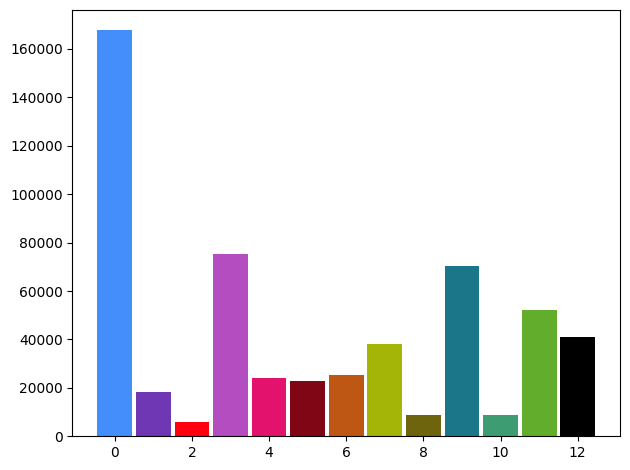

In [11]:
# Set the width of each bar and the space between the bars
width = 0.9

# Loop over each cell type and create a stacked bar plot of the "species" category
for i, cell_type in enumerate(df.index):
    ind = np.arange(1)
    S1 = df["count"]
    sample_type = df.index[i]
    #p1 = plt.bar(i, S1[i], width, color = colors[sample_type])
    p1 = plt.bar(i, S1[i], width, color = colors[sample_type])
    # Show the plot
plt.tight_layout()

plt.show()

                   count sampleBreakdown sampleOrder_connectivity  \
cellType_CosMx_1                                                    
PT                167722  [73746, 93976]         <class 'object'>   
iPT                18183   [13105, 5078]         <class 'object'>   
PEC                 5755    [1811, 3944]         <class 'object'>   
TAL                75458  [24582, 50876]         <class 'object'>   
Injured TAL        24028   [21157, 2871]         <class 'object'>   
DCT                22763   [4027, 18736]         <class 'object'>   
IC/DCT             25426   [6435, 18991]         <class 'object'>   
PC                 37993  [19210, 18783]         <class 'object'>   
Podo                8920    [1617, 7303]         <class 'object'>   
Fibro              70389  [53848, 16541]         <class 'object'>   
VSMC/Mes            8636    [4926, 3710]         <class 'object'>   
Endothelium        52335  [28483, 23852]         <class 'object'>   
Immune             40993  [22013, 

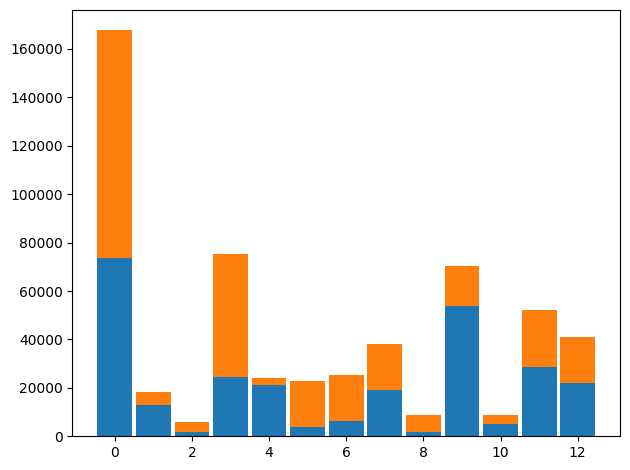

In [12]:
for i in df.index:
    counts_sample = []
    for j in adata.obs["sample"].unique():
        counts_sample.append(adata.obs[(adata.obs['sample'] == j) & (adata.obs['cellType_CosMx_1'] == i)].shape[0])
    df.at[i,'sampleBreakdown'] = counts_sample

print(df)

# Set the width of each bar and the space between the bars
width = 0.9

# Loop over each cell type and create a stacked bar plot of the "sample" category
for i, cell_type in enumerate(df.index):
    ind = np.arange(1)
    S1 = df.sampleBreakdown[i]

    palette = plt.cm.get_cmap('tab10')
    bottom = 0
    for j in range(len(S1)):
          plt.bar(i, S1[j],bottom = bottom, width = width, color = palette(j))
          bottom = bottom + S1[j]
    # Show the plot
plt.tight_layout()

plt.show()

                   count                            sampleBreakdown  \
cellType_CosMx_1                                                      
PT                167722  [0.43969187107236973, 0.5603081289276303]   
iPT                18183  [0.7207281526700764, 0.27927184732992355]   
PEC                 5755  [0.31468288444830583, 0.6853171155516942]   
TAL                75458  [0.32577062736886747, 0.6742293726311326]   
Injured TAL        24028   [0.880514399866822, 0.11948560013317795]   
DCT                22763   [0.1769098976409085, 0.8230901023590915]   
IC/DCT             25426  [0.25308739085974985, 0.7469126091402501]   
PC                 37993  [0.5056194562156187, 0.49438054378438134]   
Podo                8920   [0.1812780269058296, 0.8187219730941704]   
Fibro              70389  [0.7650058958075836, 0.23499410419241643]   
VSMC/Mes            8636  [0.5704029643353404, 0.42959703566465957]   
Endothelium        52335  [0.5442438138912773, 0.45575618610872265]   
Immune

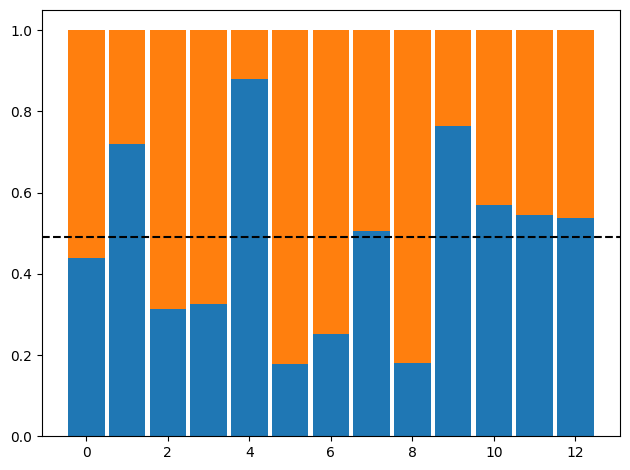

In [13]:
for i in df.index:
    counts_sample = []
    for j in adata.obs["sample"].unique():
        counts_sample.append(adata.obs[(adata.obs['sample'] == j) & (adata.obs['cellType_CosMx_1'] == i)].shape[0])
    sumtotal = (df.loc[i,"count"])
    counts_sample = list(map(lambda x: x / sumtotal, counts_sample))
    df.at[i,'sampleBreakdown'] = counts_sample

print(df)

# Set the width of each bar and the space between the bars
width = 0.9

# Loop over each cell type and create a stacked bar plot of the "sample" category
for i, cell_type in enumerate(df.index):
    ind = np.arange(1)
    S1 = df.sampleBreakdown[i]

    palette = plt.cm.get_cmap('tab10')
    bottom = 0
    for j in range(len(S1)):
          plt.bar(i, S1[j],bottom = bottom, width = width, color = palette(j))
          bottom = bottom + S1[j]
    # Show the plot
plt.tight_layout()
plt.axhline(y=0.49, color='black', linestyle = 'dashed')

plt.show()

In [14]:
for i in df.index:   
  sampleOrder = df.index.tolist()
  df.at[i,"sampleOrder_connectivity"] = sampleOrder
  ### check average connectivity
  type_array = (np.where(adata.obs["cellType_CosMx_1"]==i)[0])
  ## 1 nearest neighbor
  connectivities_cellType = adata.obsp["1_nn_connectivities"][type_array,:] # make an matrix with just cell type i comprising rows
  sum = connectivities_cellType.sum()
  nn_1 = []
  for j in df.index:
    type2_array = (np.where(adata.obs["cellType_CosMx_1"]==j)[0])
    nn_1.append(connectivities_cellType[:,type2_array].sum()/(sum))
  df.at[i,"nn1"] = nn_1
  ## 20 nearest neighbors
  connectivities_cellType = adata.obsp["20_nn_connectivities"][type_array,:] # make an matrix with just cell type i comprising rows
  sum = connectivities_cellType.sum()
  nn_20 = []
  for j in df.index:
    type2_array = (np.where(adata.obs["cellType_CosMx_1"]==j)[0])
    nn_20.append(connectivities_cellType[:,type2_array].sum()/(sum))
  df.at[i,"nn20"] = nn_20
  ## 100 nearest neighbors
  connectivities_cellType = adata.obsp["100_nn_connectivities"][type_array,:] # make an matrix with just cell type i comprising rows
  sum = connectivities_cellType.sum()
  nn_100 = []
  for j in df.index:
    type2_array = (np.where(adata.obs["cellType_CosMx_1"]==j)[0])
    nn_100.append(connectivities_cellType[:,type2_array].sum()/(sum))
  df.at[i,"nn100"] = nn_100
  ## 20 micron  neighbors
  connectivities_cellType = adata.obsp["20_micron_connectivities"][type_array,:] # make an matrix with just cell type i comprising rows
  sum = connectivities_cellType.sum()
  micron_20 = []
  for j in df.index:
    type2_array = (np.where(adata.obs["cellType_CosMx_1"]==j)[0])
    micron_20.append(connectivities_cellType[:,type2_array].sum()/(sum))
  df.at[i,"micron20"] = micron_20

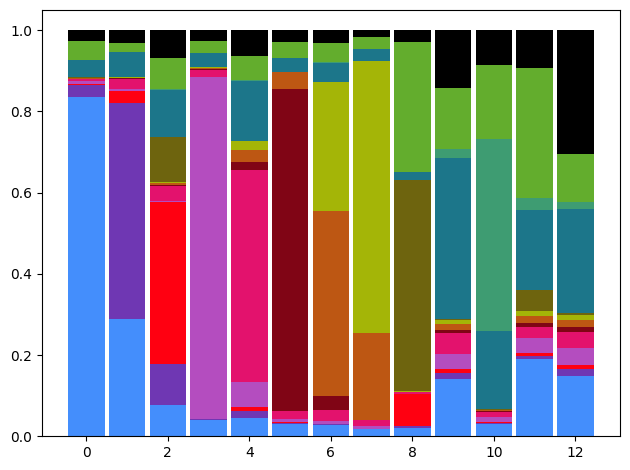

In [15]:
# Set the width of each bar and the space between the bars
width = 0.9


# Loop over each cell type and create a stacked bar plot of the "sample" category
for i, cell_type in enumerate(df.index):
    ind = np.arange(1)
    S1 = df.nn1[i]

    bottom = 0
    for j in range(len(S1)):
        sample_type = df.index[j]
        plt.bar(i, S1[j],bottom = bottom, width = width, color = colors[sample_type])

        bottom = bottom + S1[j]
        #print(j)

    # Show the plot
plt.tight_layout()

plt.show()


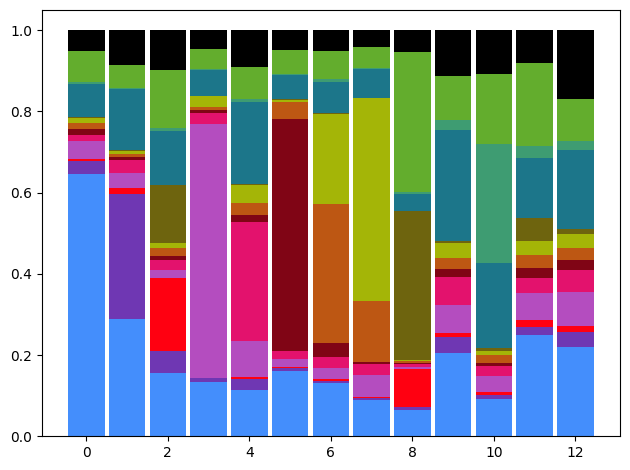

In [16]:
# Set the width of each bar and the space between the bars
width = 0.9


# Loop over each cell type and create a stacked bar plot of the "sample" category
for i, cell_type in enumerate(df.index):
    ind = np.arange(1)
    S1 = df.nn20[i]

    bottom = 0
    for j in range(len(S1)):
        sample_type = df.index[j]
        plt.bar(i, S1[j],bottom = bottom, width = width, color = colors[sample_type])
        bottom = bottom + S1[j]

    # Show the plot
plt.tight_layout()

plt.show()

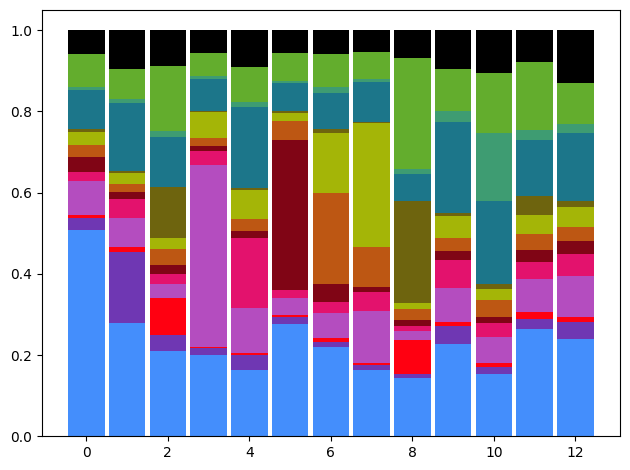

In [17]:
# Set the width of each bar and the space between the bars
width = 0.9


# Loop over each cell type and create a stacked bar plot of the "sample" category
for i, cell_type in enumerate(df.index):
    ind = np.arange(1)
    S1 = df.nn100[i]

    bottom = 0
    for j in range(len(S1)):
        sample_type = df.index[j]
        plt.bar(i, S1[j],bottom = bottom, width = width, color = colors[sample_type])
        bottom = bottom + S1[j]

    # Show the plot
plt.tight_layout()

plt.show()


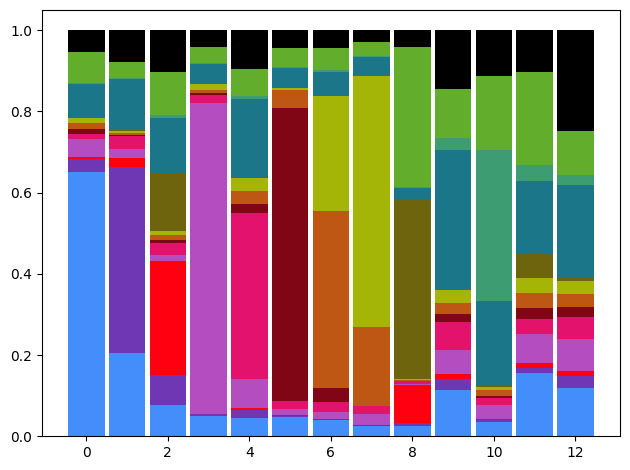

In [18]:
# Set the width of each bar and the space between the bars
width = 0.9


# Loop over each cell type and create a stacked bar plot of the "sample" category
for i, cell_type in enumerate(df.index):
    ind = np.arange(1)
    S1 = df.micron20[i]

    bottom = 0
    for j in range(len(S1)):
        sample_type = df.index[j]
        plt.bar(i, S1[j],bottom = bottom, width = width, color = colors[sample_type])
        bottom = bottom + S1[j]

    # Show the plot
plt.tight_layout()

plt.show()


In [19]:
sq.gr.spatial_neighbors(
    adata,
    radius=0.02,
    coord_type="generic",
)

# 20 micron neighborhood

(array([3.1150e+03, 1.2091e+04, 2.8474e+04, 4.5960e+04, 5.8063e+04,
        6.2791e+04, 6.1784e+04, 5.7964e+04, 5.2403e+04, 4.5572e+04,
        3.7688e+04, 2.9723e+04, 2.2083e+04, 1.5453e+04, 1.0401e+04,
        6.2800e+03, 3.7700e+03, 2.2890e+03, 1.2490e+03, 6.9200e+02,
        3.5800e+02, 1.9600e+02, 8.6000e+01, 5.8000e+01, 2.2000e+01,
        1.0000e+01, 1.1000e+01, 7.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]),
 <BarContainer object of 49 artists>)

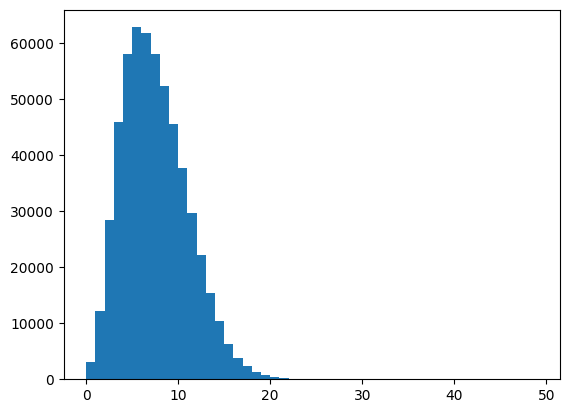

In [20]:
neighbor_check = []
for i in range(adata.obsp["spatial_connectivities"].shape[0]):
  neighbor_check.append(np.sum(adata.obsp["spatial_connectivities"][i]))

# total number of neighbors
plt.hist(neighbor_check, bins = np.arange(0, 50, 1))

In [21]:
immuneCells = (np.where(adata.obs['cellType_CosMx_1']=="Immune")[0])
neighbors_immune = np.where(adata.obsp["spatial_connectivities"][:, immuneCells].sum(axis=1) > 0)[0]
adata.obs["immune_neighbors"] = 0

for i in neighbors_immune:
  adata.obs["immune_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, immuneCells])


/tmp/ipykernel_178718/1824518704.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["immune_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, immuneCells])


plt.hist(adata.obs["immune_neighbors"], bins = np.arange(0, 20, 1))

sc.pl.violin(adata, ['immune_neighbors'], size = 0, groupby = 'cellType_CosMx_1', rotation= 45, title = "Immune Neighbors")


adata_PT = adata[adata.obs['cellType_CosMx_1'].isin(["PT", "iPT/PEC"])]



import matplotlib.colors
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(35,26))
ax = fig.add_subplot(111, title="Test scatter")
ax.scatter(adata_PT.obs["x_slide_mm"], adata_PT.obs["y_slide_mm"], c=(adata_PT.obs['immune_neighbors']).astype(int), s = 0.5, cmap ='viridis_r')
ax.axis('off')
ax.get_figure().gca().set_title("")
ax.set_facecolor('none')


neighbor_check = []
for i in range(adata_PT.obsp["spatial_connectivities"].shape[0]):
  neighbor_check.append(np.sum(adata.obsp["spatial_connectivities"][i]))

# total number of neighbors for PT cells
plt.hist(neighbor_check, bins = np.arange(0, 50, 1), alpha = 0.5)

plt.hist(adata_PT.obs["immune_neighbors"], bins = np.arange(0, 20, 1), alpha = 0.5)

sc.pl.umap(adata, color = "immune_neighbors", cmap = "viridis_r", vmax=5)

adata_PT = adata[adata.obs['cellType_CosMx_1'].isin(["Podo"])]

neighbor_check = []
for i in range(adata_PT.obsp["spatial_connectivities"].shape[0]):
  neighbor_check.append(np.sum(adata.obsp["spatial_connectivities"][i]))

# total number of neighbors for PT cells
plt.hist(neighbor_check, bins = np.arange(0, 50, 1), alpha = 0.5)

plt.hist(adata_PT.obs["immune_neighbors"], bins = np.arange(0, 20, 1), alpha = 0.5)

adata_PT.obs["ImmuneNeighbor"] = (adata_PT.obs["immune_neighbors"] > 0).astype('str')

print(adata_PT.obs["ImmuneNeighbor"].value_counts())

adata_PT.X = adata_PT.layers["counts"]

sc.pp.log1p(adata_PT)

sc.tl.rank_genes_groups(adata_PT, groupby='ImmuneNeighbor', method='wilcoxon', pts = True)
sc.pl.rank_genes_groups(adata_PT, n_genes=25, sharey=False)